<a href="https://colab.research.google.com/github/StefanGarcziu/DeepLearning_5semester/blob/main/DL_Zad1a_StepanGarciu_135843.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Użycie pakietu Scikit Learn https://scikit-learn.org






# Załączone pakiety

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Przykład z punktami w trójkącie


In [15]:
# zwraca losowe współrzędne x1, x2 oraz с dla punktów 

def punkt_tr():
    x1=random.random()
    x2=random.random()
    if (1.2-x1-x2>0) and (-0.2+x1>0) and (-0.2+x2)>0:
        c=1
    else:
        c=0
    return np.array([x1,x2,c])


# `Przygotowanie danych`

In [16]:
probka_k=np.array([punkt_tr() for i in range(6000)])
print(probka_k.shape)

(6000, 3)


# Definiuję funkcję rysującą dane

In [17]:
def draw_result(X,y): 
  fig=plt.figure(figsize=(5,5))

  plt.title("Działanie na próbce testowej",fontsize=16) 
  plt.xlim(min(X[:,0]),max(X[:,0]))
  plt.ylim(min(X[:,1]),max(X[:,1]))
  plt.scatter(X[:,0],X[:,1],c=y,
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=min(y), vmax=max(y)))

  plt.xlabel('$x_1$',fontsize=18)
  plt.ylabel('$x_2$',fontsize=18);

# Przygotowanie formatu danych

Shapes of datasets X_train, X_test, y_train, y_test:  (3000, 2) (3000, 2) (3000,) (3000,)


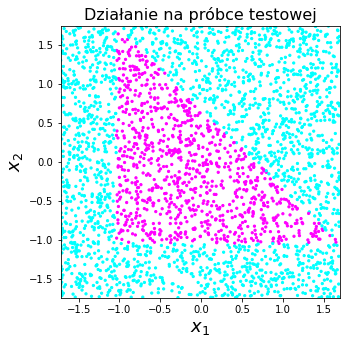

In [18]:

X, y = probka_k[:,:2], probka_k[:,2]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

print("Shapes of datasets X_train, X_test, y_train, y_test: ",X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#narysuj dane testowe
draw_result(X_test, y_test)

# **Trening** 

Instrukcja użycia Multi Layer Perceptron
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [19]:

clf = MLPClassifier(hidden_layer_sizes=(5,5), activation='tanh', alpha=0.1, 
                    learning_rate_init=0.01, early_stopping=True,validation_fraction=0.2,verbose=True,n_iter_no_change=100,max_iter=1000)
                    #max_iter=1000) 


print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = 0.61582625
Validation score: 0.685000
Iteration 2, loss = 0.57993056
Validation score: 0.685000
Iteration 3, loss = 0.55636731
Validation score: 0.685000
Iteration 4, loss = 0.53544738
Validation score: 0.656667
Iteration 5, loss = 0.51148522
Validation score: 0.686667
Iteration 6, loss = 0.48494054
Validation score: 0.756667
Iteration 7, loss = 0.45687585
Validation score: 0.790000
Iteration 8, loss = 0.43067708
Validation score: 0.823333
Iteration 9, loss = 0.41186701
Validation score: 0.810000
Iteration 10, loss = 0.40043161
Validation score: 0.845000
Iteration 11, loss = 0.39307277
Validation score: 0.836667
Iteration 12, loss = 0.38359665
Validation score: 0.833333
Iteration 13, loss = 0.37577308
Validation score: 0.851667
Iteration 14, loss = 0.36466514
Validation score: 0.863333
Iteration 15, loss = 0.35053303
Validation score: 0.865000
Iteration 16, loss = 0.33089752
Validation score: 0.893333
Iteration 17, loss = 0.30266326
Validation score: 0.928333
Iterat

# Plot training andvalidation loss

[0.685, 0.685, 0.685, 0.6566666666666666, 0.6866666666666666, 0.7566666666666667, 0.79, 0.8233333333333334, 0.81, 0.845, 0.8366666666666667, 0.8333333333333334, 0.8516666666666667, 0.8633333333333333, 0.865, 0.8933333333333333, 0.9283333333333333, 0.95, 0.9516666666666667, 0.9516666666666667, 0.9683333333333334, 0.97, 0.9816666666666667, 0.9833333333333333, 0.9833333333333333, 0.9883333333333333, 0.9816666666666667, 0.9866666666666667, 0.9883333333333333, 0.9866666666666667, 0.9866666666666667, 0.9883333333333333, 0.99, 0.9866666666666667, 0.985, 0.99, 0.99, 0.9866666666666667, 0.985, 0.99, 0.9866666666666667, 0.99, 0.9866666666666667, 0.9883333333333333, 0.9866666666666667, 0.985, 0.9883333333333333, 0.9916666666666667, 0.985, 0.99, 0.985, 0.99, 0.99, 0.9883333333333333, 0.99, 0.99, 0.9883333333333333, 0.99, 0.995, 0.9866666666666667, 0.995, 0.995, 0.9883333333333333, 0.995, 0.9916666666666667, 0.99, 0.995, 0.99, 0.9966666666666667, 0.9916666666666667, 0.995, 0.9933333333333333, 0.995

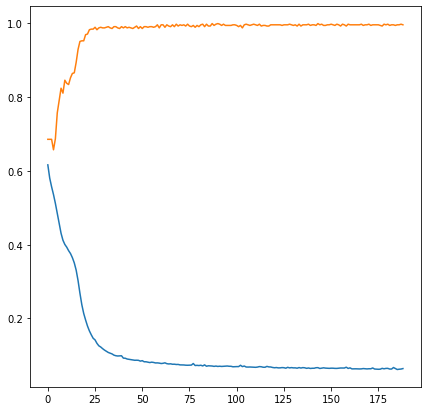

In [20]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

#Narysuj dane testowe z prawdopodobieństwem przewidywanym przez sieć neuronową

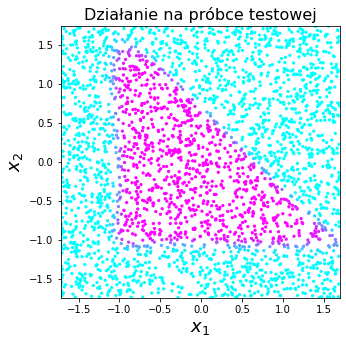

In [21]:
draw_result(X_test, Z)

# **Krzywa ROC**

<Figure size 504x504 with 0 Axes>

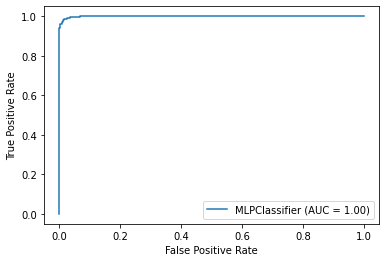

Area Under Curve AUC =  0.9990641639994393
Area Under Curve AUC =  0.9990641639994393


In [22]:
from sklearn.metrics import plot_roc_curve, auc, roc_curve, roc_auc_score

fig=plt.figure(figsize=(7,7))

roc_disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

#Print AUC
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print("Area Under Curve AUC = ",roc_auc)

#simpler method
print("Area Under Curve AUC = ",roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

# Visualize NN

--2020-11-20 19:21:58--  https://raw.githubusercontent.com/jzliu-100/visualize-neural-network/master/VisualizeNN.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9495 (9.3K) [text/plain]
Saving to: ‘VisualizeNN.py.7’

VisualizeNN.py.7    100%[===================>]   9.27K  --.-KB/s    in 0s      

2020-11-20 19:21:58 (58.9 MB/s) - ‘VisualizeNN.py.7’ saved [9495/9495]



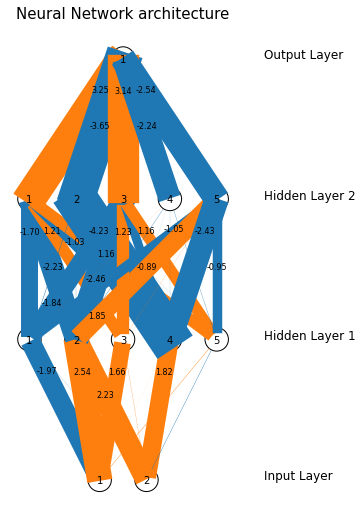

In [23]:
! wget https://raw.githubusercontent.com/jzliu-100/visualize-neural-network/master/VisualizeNN.py

import VisualizeNN as VisNN
'''
print(clf.hidden_layer_sizes[0])
print(clf.n_outputs_)
print(clf.coefs_[0].shape)
print(clf.coefs_[1].shape)
print(clf.coefs_[2].shape)
'''

NN = list(clf.hidden_layer_sizes)
NN.append(clf.n_outputs_)
NN.insert(0,clf.coefs_[0].shape[0])
network=VisNN.DrawNN(NN,clf.coefs_)
network.draw()

# To samo z użyciem drzew decyzyjnych BDT

In [24]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Drzewo decyzyjne
#clf = DecisionTreeClassifier(max_depth=5)

# Wzmocnione drzewo decyzyjne BDT
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)


print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

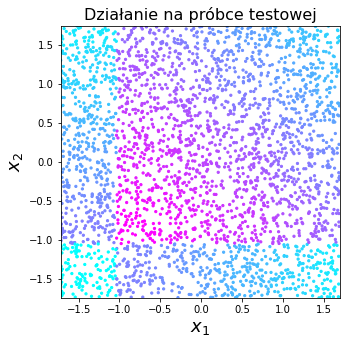

In [25]:
draw_result(X_test,Z)

# **Krzywa ROC**

<Figure size 504x504 with 0 Axes>

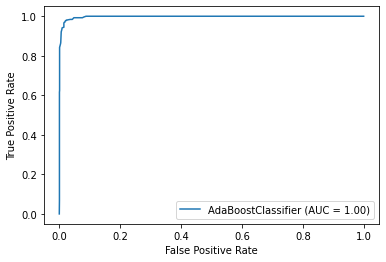

Area Under Curve AUC =  0.9972240486572641
Area Under Curve AUC =  0.9972240486572641


In [26]:
from sklearn.metrics import plot_roc_curve, auc, roc_curve, roc_auc_score

fig=plt.figure(figsize=(7,7))

roc_disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

#Print AUC
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print("Area Under Curve AUC = ",roc_auc)

#simpler method
print("Area Under Curve AUC = ",roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))